<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

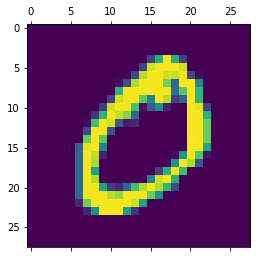

In [9]:
plt.matshow(X_train[1])

In [11]:
y_train[1]

0

In [12]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2733 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1242 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0866 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0654 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0424 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0345 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.9758


[0.08687704056501389, 0.9757999777793884]

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [17]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1723 - accuracy: 0.9494
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0561 - accuracy: 0.9833
Epoch 3/5
1001/1875 [===============>..............] - ETA: 11s - loss: 0.0359 - accuracy: 0.9884

In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [56]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9843


[0.05414153262972832, 0.9843000173568726]